In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

pd.set_option('display.float_format',  '{:.1f}'.format)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('national-pension.csv', encoding = 'cp949')
df.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2022-12,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,610,330,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,4,899980,0,0
1,2022-12,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,650,320,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,11,3278020,0,0
2,2022-12,노들새마을금고,108820,1,06923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,590,101,1,659202,신용조합,1988-01-01,NaN,NaN,12,4956440,0,0
3,2022-12,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,260,119,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,24,5371000,0,0
4,2022-12,희성전자(주),106810,1,04410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,170,131,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,395,187943100,0,1


In [5]:
# 코드를 입력해 주세요
df.columns = [
    '자료생성년월', '사업장명', '사업자등록번호', '가입상태', '우편번호',
    '사업장지번상세주소', '주소', '고객법정동주소코드', '고객행정동주소코드', 
    '시도코드', '시군구코드', '읍면동코드', 
    '사업장형태구분코드 1 법인 2 개인', '업종코드', '업종코드명', 
    '적용일자', '재등록일자', '탈퇴일자',
    '가입자수', '금액', '신규', '상실'
]
df = df.drop(['자료생성년월', '우편번호', '사업장지번상세주소', '고객법정동주소코드', '고객행정동주소코드', '사업장형태구분코드 1 법인 2 개인', '적용일자', '재등록일자'], axis=1)
df.head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,우성기전(주),126811,1,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,NaN,4,899980,0,0
1,서능공원묘지운영회(재),102820,1,,41,650,320,701700,화장터 운영 묘지 분양 및 관리업,NaN,11,3278020,0,0
2,노들새마을금고,108820,1,서울특별시 동작구 만양로,11,590,101,659202,신용조합,NaN,12,4956440,0,0
3,유창성업(주),122812,1,인천광역시 서구 갑문2로,28,260,119,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,NaN,24,5371000,0,0
4,희성전자(주),106810,1,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),NaN,395,187943100,0,1


In [64]:
# Regular Expression(정규화) 모듈 사용
import re

pattern1 = '(\([^)]+\))'
re.sub(pattern1, '', '우성기전(주)')

'우성기전'

In [7]:
pattern2 = '(\[[^)]+\])'
re.sub(pattern2, '', '에스티테크[주]')

'에스티테크'

In [8]:
pattern3 = '[^A-Za-z0-9가-힣]'
result = re.sub(pattern3, ' ', '*^%$^의료법인%해정^&*****%!@의료재단/더/좋은/병원')
result = re.sub(' +', ' ', result)
result

' 의료법인 해정 의료재단 더 좋은 병원'

In [10]:
# 위에서 지정한 정규식 패턴을 이용해 사업장명을 전처리하는 함수
def preprocessing(x):
    x = re.sub(pattern1, '', x)
    x = re.sub(pattern2, '', x)
    x = re.sub(pattern3, '', x)
    x = re.sub(' +', ' ', x)

    return x

df['사업장명'] = df['사업장명'].apply(preprocessing)

In [11]:
df.head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,우성기전,126811,1,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,NaN,4,899980,0,0
1,서능공원묘지운영회,102820,1,,41,650,320,701700,화장터 운영 묘지 분양 및 관리업,NaN,11,3278020,0,0
2,노들새마을금고,108820,1,서울특별시 동작구 만양로,11,590,101,659202,신용조합,NaN,12,4956440,0,0
3,유창성업,122812,1,인천광역시 서구 갑문2로,28,260,119,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,NaN,24,5371000,0,0
4,희성전자,106810,1,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),NaN,395,187943100,0,1


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

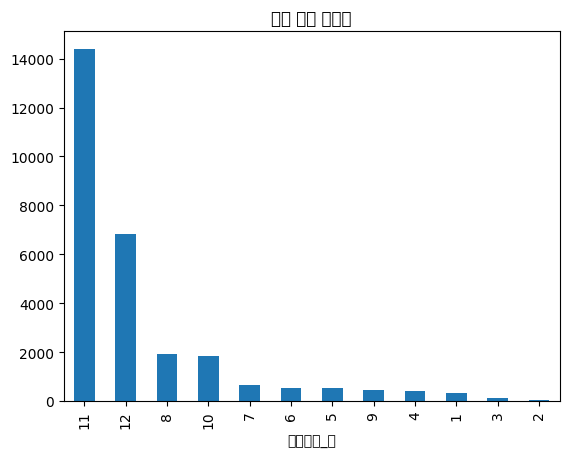

In [12]:
# 2022년도에 탈퇴한 기업의 월별 탈퇴 수를 확인
#  가입상태 : 2번 탈퇴

df['탈퇴일자_연도'] =  pd.to_datetime(df['탈퇴일자']).dt.year
df['탈퇴일자_월'] =  pd.to_datetime(df['탈퇴일자']).dt.month
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2022), '탈퇴일자_월'].astype('int').value_counts().plot(kind='bar')
plt.title('월별 탈퇴 기업수')
plt.show()

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

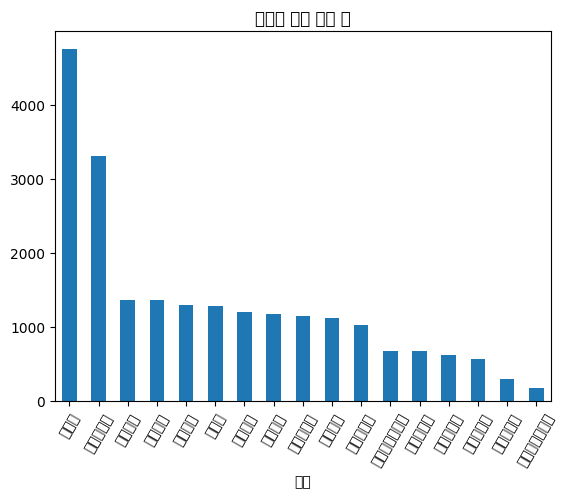

In [13]:
# 시/도별 탈퇴 기업 수

df['시도'] = df['주소'].str.split(' ').str[0]
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2022) & (df['시도'].apply(lambda x: len(x.strip())) > 0), '시도'].value_counts().plot(kind='bar')
plt.title('시도별 탈퇴 기업 수')
plt.xticks(rotation=60)
plt.show()

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

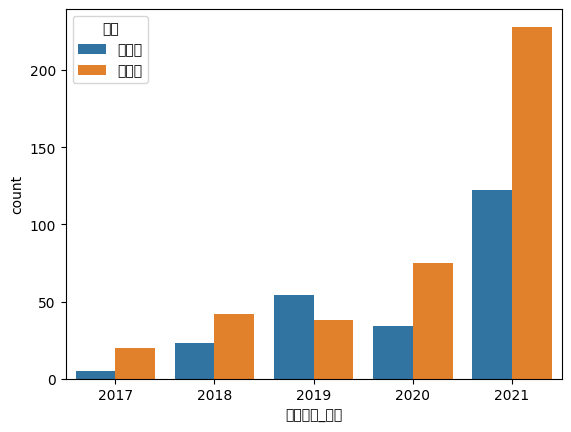

In [14]:
# 탈퇴한 기업 중 상반기/ 하반기 비교
cond1 = (df['가입상태'] == 2) & (df['탈퇴일자_연도'] >= 2017) & (df['탈퇴일자_연도'] <= 2021)
tmp = df.loc[cond1].copy()
tmp['반기'] = np.where(tmp['탈퇴일자_월'] <= 6, '상반기', '하반기')
tmp['탈퇴일자_연도'] = tmp['탈퇴일자_연도'].astype('int')
sns.countplot(x='탈퇴일자_연도', hue='반기', data=tmp)
df = df.drop(['탈퇴일자_연도', '탈퇴일자_월','시도'], axis=1)
plt.show()

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

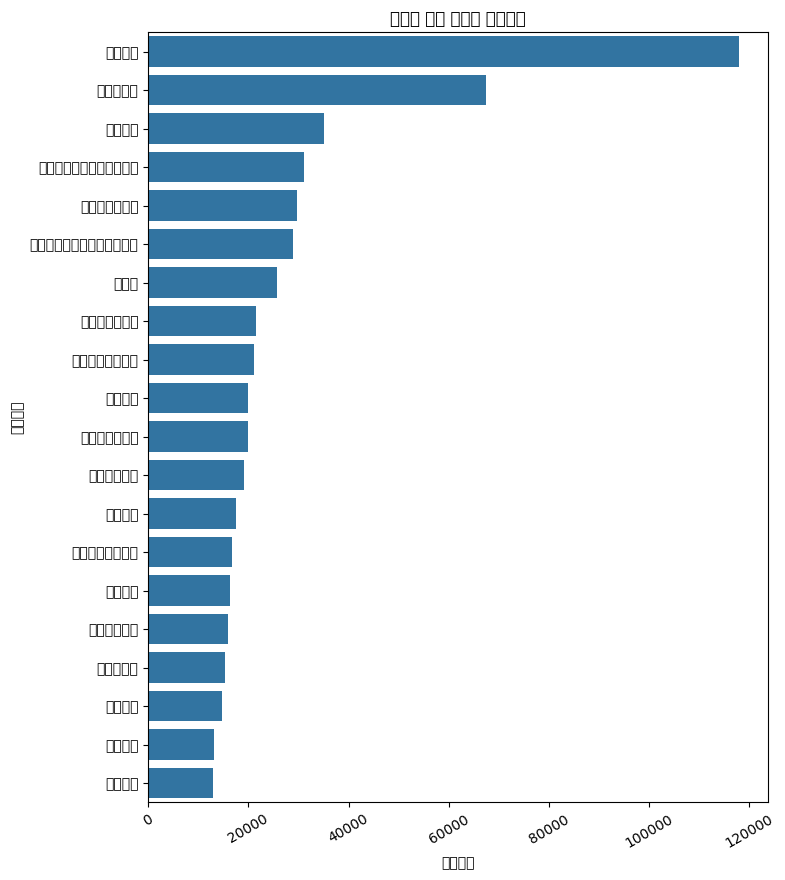

In [15]:
plt.figure(figsize=(8, 10))
tmp = df.loc[df['시도코드'].isin([11, 41]), ['사업장명', '가입자수']].sort_values('가입자수', ascending=False).head(20).reset_index()
sns.barplot(y='사업장명', x='가입자수', data=tmp)
plt.xticks(rotation=30)
plt.title('수도권 소재 기업별 가입자수')
plt.show()

# 국민연금 납부 금액으로 기업별 연봉 평균 추정
- 국민연금 보험율 : 9%, 급여의 9%가 국민연금으로 나감
- 여기서 4.5%를 회사가, 나머지를 개인이 부담하는 구조
- 정확한 수치는 아님

In [28]:
df

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실,인당금액,월급여추정,연감급여추정,순유입,연간급여추정
0,우성기전,126811,1,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,NaN,4,899980,0,0,224995.0,247247.3,2966967.0,0,2966967.0
1,서능공원묘지운영회,102820,1,,41,650,320,701700,화장터 운영 묘지 분양 및 관리업,NaN,11,3278020,0,0,298001.8,327474.5,3929694.3,0,3929694.3
2,노들새마을금고,108820,1,서울특별시 동작구 만양로,11,590,101,659202,신용조합,NaN,12,4956440,0,0,413036.7,453886.4,5446637.4,0,5446637.4
3,유창성업,122812,1,인천광역시 서구 갑문2로,28,260,119,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,NaN,24,5371000,0,0,223791.7,245924.9,2951098.9,0,2951098.9
4,희성전자,106810,1,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),NaN,395,187943100,0,1,475805.3,522863.0,6274355.8,-1,6274355.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550737,주대덕조경일용충남내포대방엘리움RH51BL아파트건설공사중조경공사,607815,1,,44,800,256,451400,조경 건설업,NaN,6,1777940,6,0,296323.3,325630.0,3907560.4,6,3907560.4
550738,상림종합전설일용시화MTVC32아티스큐브생활형숙박시설신축공사,212816,1,,41,273,104,452104,배관 및 냉ㆍ난방 공사업,NaN,9,4085540,9,0,453948.9,498844.9,5986139.2,9,5986139.2
550739,신흥공영주일용아난티캐비닛드이터널저니신축공사중습식공사,106811,1,,11,680,108,452107,도배 실내 장식 및 내장 목공사업,NaN,4,1262240,4,0,315560.0,346769.2,4161230.8,4,4161230.8
550740,아힘산업주식회사페어필드바이메리어트서울금정신축공사중수장공사,642870,1,,41,410,105,452102,유리 및 창호 공사업,NaN,3,1119240,3,0,373080.0,409978.0,4919736.3,3,4919736.3


In [31]:
# 수식 정리
# 인당 금액 = 금액 / 가입자 수
# 1인당 월 급여 추정 = 인당 금액 / 9% * 100%
# 연봉 추정은 = 1인당 월 급여 추정 * 12개월
df['인당금액'] = df['금액'] / df['가입자수']
df['월급여추정'] = df['인당금액'] / 9 * 100
df['연간급여추정'] = df['월급여추정'] * 12

mask = df['가입자수'] > 1000 

In [32]:
df.sort_values(['연간급여추정', '가입자수'], ascending=False).loc[mask, ['사업장명', '가입자수', '월급여추정', '연간급여추정']].head(10)

,사업장명,가입자수,월급여추정,연간급여추정
6658,기아영업본부,2563,5529827.9,66357934.7
227894,부산항만산업협회화물고정업,1094,5517134.3,66205611.2
3431,주식회사현대케피코,1545,5507191.9,66086303.3
272632,삼성물산건설부문정규직,4484,5496792.8,65961514.1
200798,삼성디스플레이,21458,5489918.2,65879018.9
6312,기아정비본부,1272,5487657.2,65851886.8
142850,기아AutoLand화성,12296,5483301.6,65799618.7
3419,삼성에스디에스,11682,5479750.5,65757006.4
97214,기아AutoLand광주,6815,5473123.4,65677481.2
182961,KB국민카드,1518,5468282.8,65619393.9


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

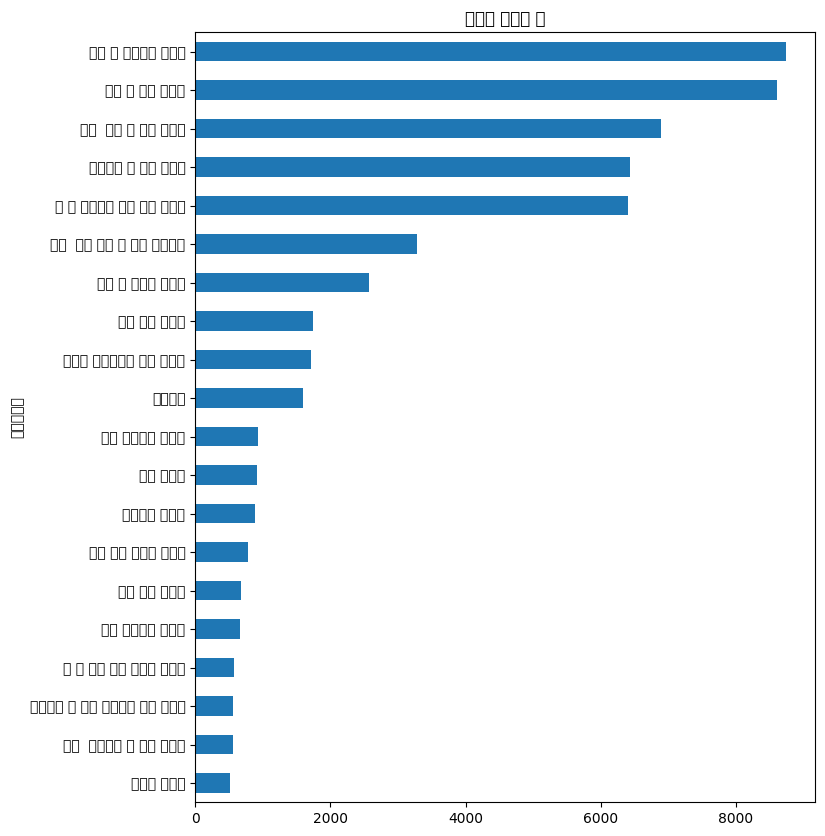

In [33]:
# 코드를 입력해 주세요
plt.figure(figsize=(8, 10))
df['순유입'] = df['신규'] - df['상실']
df.groupby('업종코드명')['순유입'].sum().sort_values(ascending=False).head(20).sort_values().plot(kind='barh')
plt.title('업종별 순유입 순')
plt.show()

In [34]:
def find_company(company_name, contains=True):
  if contains:
    return df.loc[df['사업장명'].str.contains(company_name), ['사업장명', '월급여추정', '연간급여추정', '업종코드', '가입자수']].sort_values('가입자수', ascending=False)
  else:
    return df.loc[df['사업장명']==company_name, ['사업장명', '월급여추정', '연간급여추정', '업종코드', '가입자수']].sort_values('가입자수', ascending=False)

In [62]:
find_company("네오플")

,사업장명,월급여추정,연간급여추정,업종코드,가입자수
12503,네오플,5224851.4,62698216.4,722000,1137
98829,네오플램,3241148.0,38893776.2,513230,277
12125,주식회사네오플라테크창원,2879968.3,34559619.0,321000,154
7755,네오플러스,3220143.3,38641719.0,722000,121
109029,주식회사네오플라테크,2999913.6,35998963.0,252101,72
85215,네오플라이,4206529.4,50478352.9,659900,34
386155,네오플로우,3087307.2,37047686.3,722000,17
175542,주식회사네오플러스,3481081.5,41772977.8,210200,15
274423,주식회사네오플레너스,3675981.5,44111777.8,741400,12
54967,네오플러스,3108240.7,37298888.9,242901,12


In [ ]:
def company_info(company_name) :
    company = find_company(company_name)
    return df.loc[company.iloc[0].name]

In [61]:
info = company_info("지오그린21")
info

사업장명                  지오그린21
사업자등록번호               119814
가입상태                       1
주소         서울특별시 구로구 디지털로33길
시도코드                      11
시군구코드                    530
읍면동코드                    102
업종코드                  742104
업종코드명          기타 엔지니어링 서비스업
탈퇴일자                     NaN
가입자수                      78
금액                  25242740
신규                         4
상실                         2
인당금액                323624.9
월급여추정              3595831.9
순유입                        2
연간급여추정            43149982.9
Name: 12633, dtype: object

In [56]:
# 코드를 입력해 주세요
def compare_company(company_name):
    company = find_company(company_name, True)
    code = company['업종코드'].iloc[0]
    df1 =df.loc[df['업종코드'] == code, ['월급여추정', '연간급여추정']].agg(['mean', 'count', 'min', 'max'])
    df1.columns = ['업종_월급여추정', '업종_연간급여추정']
    df1 = df1.T
    df1.columns = ['평균', '개수', '최소', '최대']
    df1.loc['업종_월급여추정', company_name] = company['월급여추정'].values[0]
    df1.loc['업종_연간급여추정', company_name] = company['연간급여추정'].values[0]
    return df1

In [63]:
compare_company('네오플')

,평균,개수,최소,최대,네오플
업종_월급여추정,3300007.4,5814.0,350000.0,5530000.0,5224851.4
업종_연간급여추정,39600089.2,5814.0,4200000.0,66360000.0,62698216.4


AttributeError: 'str' object has no attribute 'iloc'

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

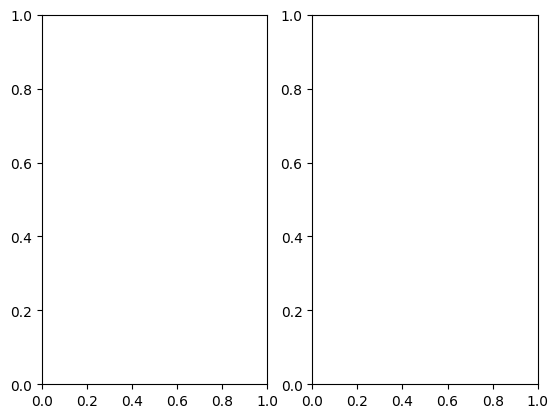

In [58]:
fig, ax = plt.subplots(1, 2)

p1 = ax[0].bar(x=['평균', '에스케이텔레콤'], height=(result.iloc[0, 0], info['월급여추정']), width=0.7)
ax[0].bar_label(p1, fmt='%d')
p1[0].set_color('black')
p1[1].set_color('red')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('월급여 비교')

p2 = ax[1].bar(x=['평균', '에스케이텔레콤'], height=(result.iloc[1, 0], info['연간급여추정']), width=0.7)
p2[0].set_color('black')
p2[1].set_color('red')
ax[1].bar_label(p2, fmt='%d')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('연봉 비교')

ax[0].tick_params(axis='both', which='major', labelsize=8, rotation=0)
ax[0].tick_params(axis='both', which='minor', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=8)
ax[1].tick_params(axis='both', which='minor', labelsize=6)

plt.tight_layout()